In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("D:\\DRUG\\Drug_CNN\\data_for_gnn.tsv",sep='\t')

In [3]:
df.head()

,smiles,interact_with_adenosine
0,BrC1=C(NC2=NCCN2)C=CC2=NC=CN=C12,0
1,C#CC1=CC=CC(NC2=NC=NC3=C2C=C2OCCOCCOCCOC2=C3)=C1,0
2,C#CCN[C@@H]1CCC2=C1C=CC=C2,0
3,CC(C)(C)C1=CC=C(C=C1)C(=O)CCCN1CCC(CC1)OC(C1=C...,1
4,C(C1=NCCN1)C1=CC=CC2=CC=CC=C12,0


In [4]:
input_data=[]
for x,y in zip(df['smiles'],df['interact_with_adenosine']):
    input_data.append([x,y])


In [5]:
import numpy as np

In [6]:
def split_dataset(dataset, ratio):
    """Shuffle and split a dataset."""
    np.random.seed(1234)  # fix the seed for shuffle.
    np.random.shuffle(dataset)
    n = int(ratio * len(dataset))
    return dataset[:n], dataset[n:]

In [7]:
dataset_train, dataset_test=split_dataset(input_data,0.8)

In [8]:
train_gen=[x[0] for x in input_data]
train_lab=[x[1] for x in input_data]

In [62]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(train_gen)
sequences = tokenizer.texts_to_sequences(train_gen)

# Pad the integer sequences to a fixed length
padded_sequences = pad_sequences(sequences, maxlen=3000, padding='post', truncating='post')

# Convert the labels to one-hot vectors
one_hot_labels = to_categorical(train_lab)

In [24]:
len(tokenizer.word_index)

34

In [60]:
max_length=3000

In [66]:
model = Sequential()
model.add(LSTM(128, input_shape=(max_length,1)))
model.add(Dense(128, activation='relu'))
model.add(Dense(len(one_hot_labels[0]), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(padded_sequences, one_hot_labels, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
50/50 [==============================] - 10s 160ms/step - loss: 0.6574 - accuracy: 0.6631 - val_loss: 0.6394 - val_accuracy: 0.6642
Epoch 2/50
50/50 [==============================] - 7s 149ms/step - loss: 0.6417 - accuracy: 0.6637 - val_loss: 0.6375 - val_accuracy: 0.6642
Epoch 3/50
50/50 [==============================] - 7s 149ms/step - loss: 0.6389 - accuracy: 0.6637 - val_loss: 0.6377 - val_accuracy: 0.6642
Epoch 4/50
50/50 [==============================] - 8s 151ms/step - loss: 0.6392 - accuracy: 0.6637 - val_loss: 0.6386 - val_accuracy: 0.6642
Epoch 5/50
50/50 [==============================] - 7s 149ms/step - loss: 0.6398 - accuracy: 0.6637 - val_loss: 0.6373 - val_accuracy: 0.6642
Epoch 6/50
50/50 [==============================] - 8s 152ms/step - loss: 0.6395 - accuracy: 0.6637 - val_loss: 0.6387 - val_accuracy: 0.6642
Epoch 7/50
50/50 [==============================] - 8s 150ms/step - loss: 0.6390 - accuracy: 0.6637 - val_loss: 0.6377 - val_accuracy: 0.6642
Epoch

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
es= EarlyStopping(monitor="accuracy",min_delta=0.04,patience=6,verbose=1,mode='auto')
mc=ModelCheckpoint(monitor="accuracy",filepath="D:\Phase II Project Work\DRUG\Drug_CNN\DTI\DTI.h5",verbose=1,save_best_only=True,mode='auto')
cd=[es,mc]

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization,GlobalAvgPool2D,GaussianNoise,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
  try:
    tf.config.set_logical_device_configuration(
        gpus[0],
        [tf.config.LogicalDeviceConfiguration(memory_limit=3072)])
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [18]:
train_gen.shape

(1395, 36, 3821, 1)

In [21]:
import tensorflow as tf
# base_model = tf.keras.applications.EfficientNetB2(weights='imagenet',input_shape=(256,256,1), include_top=False)
# base_model = tf.keras.applications.resnet50.ResNet50(weights='imagenet', input_shape=(224,224,3), include_top=False)
# with tf.device('/GPU:0'):
model = Sequential()
model.add(Conv2D(64, (3,3), activation='relu',padding='Same', input_shape=(36,3821,1)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 36, 3821, 64)      640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 1910, 64)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 1908, 64)      36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 954, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 6, 952, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 365568)           

In [22]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy','Precision','Recall'])

In [23]:

              
hs=model.fit(
    train_gen,
    train_lab,
    batch_size=16,
    epochs=8,
    verbose=1,  
    validation_data=(test_gen,test_lab),
    callbacks=cd
    )


Epoch 1/8
100/100 [==============================] - ETA: 0s - loss: 0.5754 - accuracy: 0.6995 - precision: 0.6995 - recall: 0.6995
Epoch 1: accuracy improved from -inf to 0.69950, saving model to D:\Phase II Project Work\DRUG\Drug_CNN\DTI\DTI.h5
100/100 [==============================] - 32s 242ms/step - loss: 0.5754 - accuracy: 0.6995 - precision: 0.6995 - recall: 0.6995 - val_loss: 0.4495 - val_accuracy: 0.7519 - val_precision: 0.7519 - val_recall: 0.7519
Epoch 2/8
100/100 [==============================] - ETA: 0s - loss: 0.2811 - accuracy: 0.8777 - precision: 0.8777 - recall: 0.8777
Epoch 2: accuracy improved from 0.69950 to 0.87767, saving model to D:\Phase II Project Work\DRUG\Drug_CNN\DTI\DTI.h5
100/100 [==============================] - 23s 230ms/step - loss: 0.2811 - accuracy: 0.8777 - precision: 0.8777 - recall: 0.8777 - val_loss: 0.2936 - val_accuracy: 0.8596 - val_precision: 0.8596 - val_recall: 0.8596
Epoch 3/8
100/100 [==============================] - ETA: 0s - loss: 0.

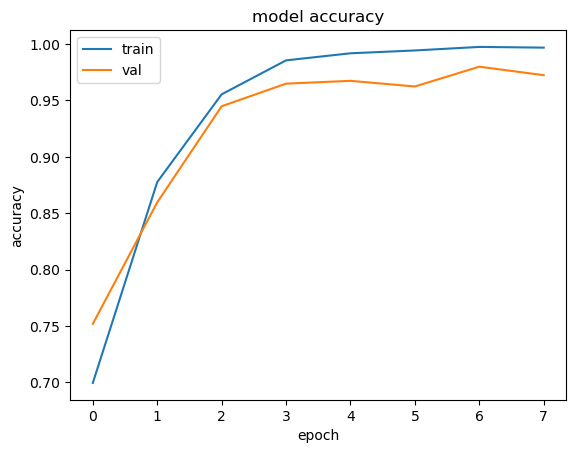

In [24]:
from matplotlib import pyplot as plt
plt.plot(hs.history['accuracy'])
plt.plot(hs.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [33]:
import numpy as np
def predict_output(x,model):
    tsr=[[0]*maxm for i in range(36)]
    k=0
    for j in x:
        tsr[atoms[j]][k]=1
        k+=1
    tsr=np.array(tsr).reshape(36,3821,1)
    res=int(np.argmax(model.predict(np.array([tsr,]))))
    print(res)
    if(res==1):
        print("the drugs will interact with adenosine ")
    else:
        print("the drugs will not interact with adenosine" )

In [38]:
import py3Dmol
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

def draw_3d(mols):
    
    mol = Chem.MolFromSmiles(mols)
    mol = Chem.AddHs(mol)
    AllChem.EmbedMolecule(mol, AllChem.ETKDG())


    mblock = Chem.MolToMolBlock(mol)
    viewer = py3Dmol.view(width=400, height=400)
    viewer.addModel(mblock, 'sdf')
    viewer.setStyle({'stick':{}})
    viewer.setBackgroundColor('0xeeeeee')
    viewer.zoomTo()
    viewer.show()

def draw_2d(mols):
     return Draw.MolToImage(Chem.MolFromSmiles(mols),size=(400,400))


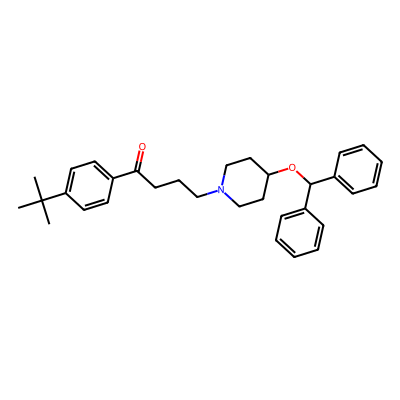

In [39]:
x="CC(C)(C)C1=CC=C(C=C1)C(=O)CCCN1CCC(CC1)OC(C1=CC=CC=C1)C1=CC=CC=C1"
draw_2d(x)

In [40]:
draw_3d(x)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [41]:
from tensorflow import keras
model = keras.models.load_model('D:\\Phase II Project Work\\DRUG\\Drug_CNN\\DTI\\DTI.h5')

In [42]:
predict_output(x,model)

1/1 [==============================] - 0s 95ms/step
1
the drugs will interact with adenosine with probability 


In [36]:
y="CC(C)(CO)C1=CC2=C(C=C(F)C(NC(=O)C3(CC3)C3=CC=C4OC(F)(F)OC4=C3)=C2)N1C[C@@H](O)CO"
predict_output(y,model)

1/1 [==============================] - 0s 26ms/step
0
the drugs will not interact with adenosine
